<h1>Cloud-Words SAE</h1>

<h2>Présentation</h2>

<h3>Qu'est-ce qu'un Cloud Words ?</h3>

<p>Un Cloud Word, aussi appelé nuage de mots clés, est une image représentant plusieurs mots prenant une dimension plus ou moins importante selon leur occurence dans un texte donné.
    
L'intérêt est de pouvoir visualiser les mots les plus utilisés et par conséquent les sujets et thèmes abordés dans le texte, dans une perspective d'analyse des données.
</p>

<h3>Dans le cas de notre étude</h3>
<p>Le jeu de données sur lequel nous travaillons étant sur des articles scientifiques, on s'attend donc à obtenir des résultats orientés sur plusieurs domaines techniques, tels que des notions mathématiques, médicales.</p>

In [1]:
%pip install matplotlib wordcloud tensorflow tqdm

<h2>Mise en place du code</h2>



<h3>Importation des différentes bibliothèques Python</h3>

In [2]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tensorflow as tf
from tqdm import tqdm  # Importer tqdm
import time
import pandas as pd

<h2>Importation des datasets</h2>

In [3]:
from google.colab import drive
import json
import os

In [4]:
drive.mount('/content/drive', force_remount=True)
pathToDataset = "drive/MyDrive/chunking-dataset"

Mounted at /content/drive


In [5]:
def load_files_from_directory(directory):
    all_data = []
    all_labels = []

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                # Assuming each file contains a list of JSON objects
                articles = json.load(file)
                for article in articles:
                    # Assuming each article is a dictionary with one key-value pair
                    for label, data in article.items():
                        all_data.append(article)
                        if label not in all_labels:
                            all_labels.append(label)

    return all_data, all_labels

def load_dataset(base_directory, dataset_type):
    dataset_directory = os.path.join(base_directory, dataset_type)
    return load_files_from_directory(dataset_directory)

train_data, train_labels = load_dataset(pathToDataset, "train")
test_data, test_labels = load_dataset(pathToDataset, "test")
val_data, val_labels = load_dataset(pathToDataset, "val")

In [6]:
def createWordCloud(dataset, sample_size):
    text = ""
    for article in dataset[:sample_size]:
        article_text = article.get('article_text', [])
        text += ' '.join(article_text) + ' '

    if text:
        wordcloud = WordCloud(width=1000, height=500).generate(text)
        plt.figure(figsize=(15,8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [7]:
sample = 100

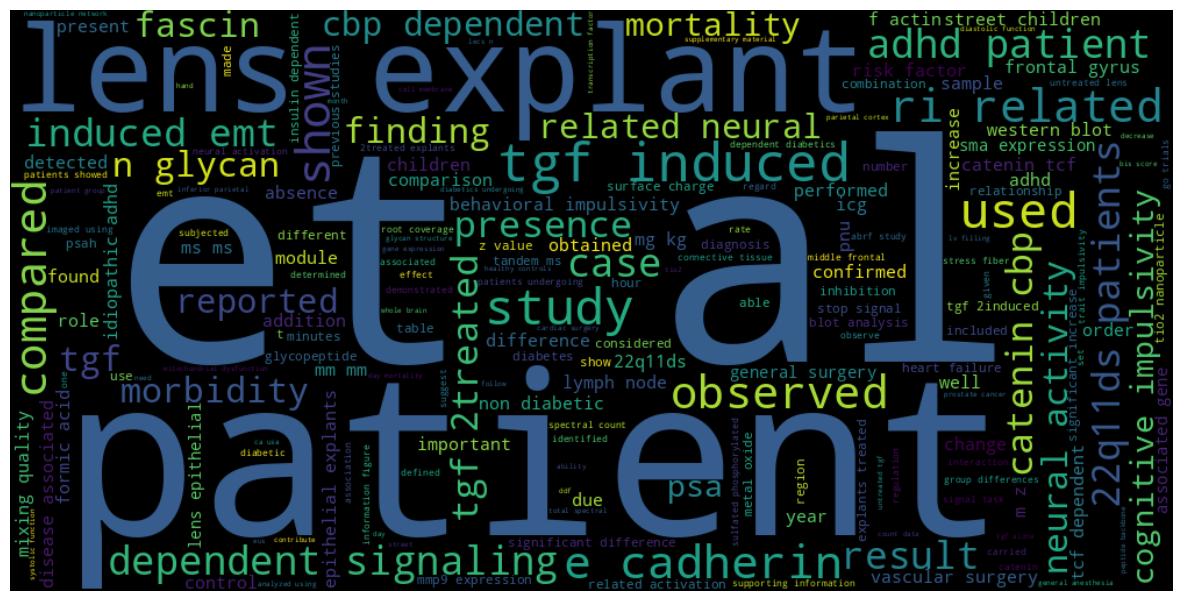

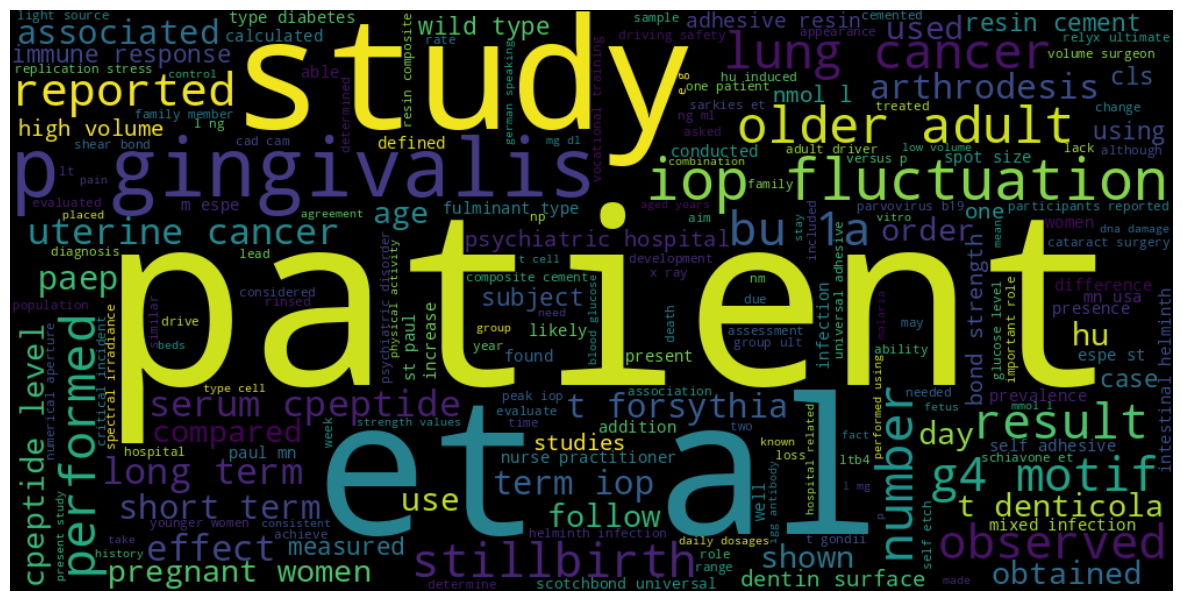

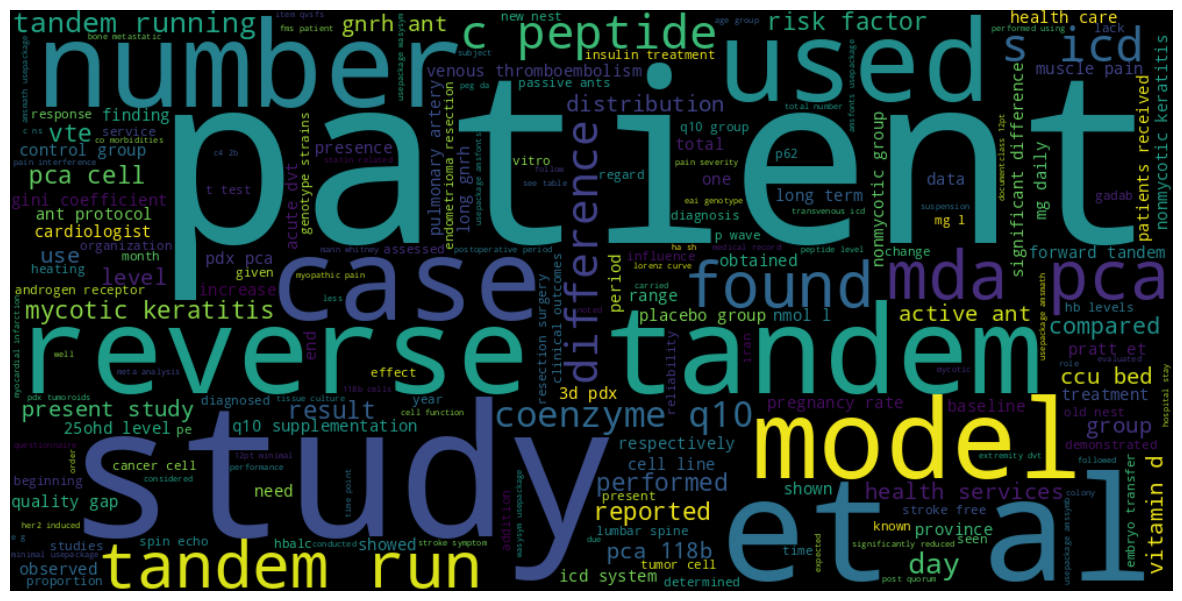

In [8]:
createWordCloud(train_data, sample)
createWordCloud(test_data, sample)
createWordCloud(val_data, sample)

In [11]:
"""
from collections import Counter
from itertools import combinations
import re

def process_batch(batch, word_count, cooccurrence_count):
    # Nettoyer le batch et le transformer en liste de mots
    words = re.findall(r'\b\w+\b', batch.lower())

    # Mettre à jour les compteurs pour le batch
    word_count.update(words)
    cooccurrence_count.update(combinations(set(words), 2))

# Initialiser le compteur de mots
word_count = Counter()
cooccurrence_count = Counter()

# Taille du batch (par exemple, 1000 mots)
batch_size = 100

# Diviser le texte en batches et les traiter
for i in range(0, len(text), batch_size):
    process_batch(text[i:i+batch_size], word_count, cooccurrence_count)

# Afficher les mots les plus fréquents
print("Mots les plus fréquents :")
for word, count in word_count.most_common(10):
    print(f"{word}: {count}")

# Afficher les cooccurrences les plus fréquentes
print("\nCooccurrences les plus fréquentes :")
for pair, count in cooccurrence_count.most_common(10):
    print(f"{pair}: {count}")
"""

'\nfrom collections import Counter\nfrom itertools import combinations\nimport re\n\ndef process_batch(batch, word_count, cooccurrence_count):\n    # Nettoyer le batch et le transformer en liste de mots\n    words = re.findall(r\'\x08\\w+\x08\', batch.lower())\n\n    # Mettre à jour les compteurs pour le batch\n    word_count.update(words)\n    cooccurrence_count.update(combinations(set(words), 2))\n\n# Initialiser le compteur de mots\nword_count = Counter()\ncooccurrence_count = Counter()\n\n# Taille du batch (par exemple, 1000 mots)\nbatch_size = 100\n\n# Diviser le texte en batches et les traiter\nfor i in range(0, len(text), batch_size):\n    process_batch(text[i:i+batch_size], word_count, cooccurrence_count)\n\n# Afficher les mots les plus fréquents\nprint("Mots les plus fréquents :")\nfor word, count in word_count.most_common(10):\n    print(f"{word}: {count}")\n\n# Afficher les cooccurrences les plus fréquentes\nprint("\nCooccurrences les plus fréquentes :")\nfor pair, count in 